              sum_sq     df         F    PR(>F)
day         9.525873    3.0  1.672355  0.173589
Residual  455.686604  240.0       NaN       NaN


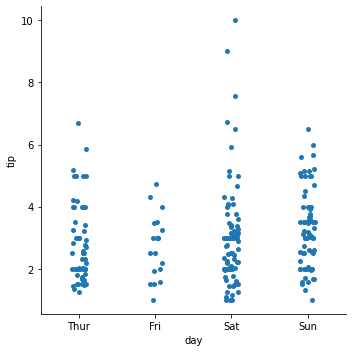

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# Load the dataset
data = sns.load_dataset("tips")

# Fit the model
model = ols("tip ~ day", data).fit()

# Perform ANOVA and print the results
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Plot the ANOVA results
sns.catplot(x="day", y="tip", data=data)

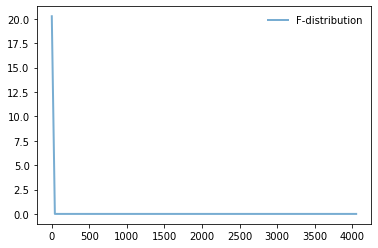

In [2]:
from scipy.stats import f
import matplotlib.pyplot as plt
import numpy as np

# Define the degrees of freedom for the numerator and denominato

dfn = 1
dfd = 1

# Generate the F-distribution
x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
y = f.pdf(x, dfn, dfd)

# Plot the F-distribution
fig, ax = plt.subplots()
ax.plot(x, y, '-', lw=2, alpha=0.6, label='F-distribution')
ax.legend(loc='best', frameon=False)
plt.show()

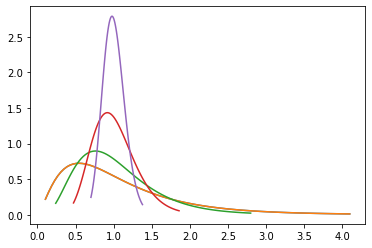

In [6]:
dfn = 5
dfd = 20
for i in range (1,6):
  
    x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
    y = f.pdf(x, dfn, dfd)
    plt.plot(x, y)
    dfn*=i
    dfd*=i
    

# One way anova 

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import scipy.stats as stats

In [138]:
df0=pd.read_csv('test.csv')
df1=pd.read_csv('train.csv')


In [45]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url).dropna(subset=['Age'])


In [144]:
model=ols('Age ~ Pclass',data=df).fit()


anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                 sum_sq     df           F        PR(>F)
Pclass     20511.429755    1.0  112.386893  1.756699e-24
Residual  129945.206190  712.0         NaN           NaN


In [132]:
p_class_pvalue = anova_result.loc['day', 'PR(>F)']

In [133]:
p_class_pvalue

0.17358855530404907

In [134]:
df.dropna(inplace=True)

In [135]:
age_by_class = [df[df['Pclass'] == 1]['Age'],
                 df[df['Pclass'] == 2]['Age'],
                 df[df['Pclass'] == 3]['Age']]

In [145]:
stats.f_oneway(*age_by_class)

F_onewayResult(statistic=9.762703872790492, pvalue=9.433803581462292e-05)

# post hoc test 

In [14]:

for class1,class2 in [(1,2),(2,3),(3,1)]: 
  print(class1,class2)
  print(stats.ttest_ind(df[df['Pclass'] == class1]['Fare'], df[df['Pclass'] == class2]['Fare']))

1 2
Ttest_indResult(statistic=10.683498499145706, pvalue=2.6541954473311136e-23)
2 3
Ttest_indResult(statistic=7.958645216676559, pvalue=1.07649090486679e-14)
3 1
Ttest_indResult(statistic=-17.177173189451008, pvalue=4.584581616830574e-53)


#### `this can lead the fwer(family wise error) or When conducting multiple tests on a dataset, the probability of making a Type I error increases, which can lead to false positive results.`

In [17]:
t_ab, p_ab = stats.ttest_ind(df[df['Pclass'] == 1]['Age'], df[df['Pclass'] == 2]['Age'])
t_ac, p_ac =stats.ttest_ind(df[df['Pclass'] == 2]['Age'], df[df['Pclass'] == 3]['Age'])
t_bc, p_bc = stats.ttest_ind(df[df['Pclass'] == 1]['Age'], df[df['Pclass'] == 3]['Age'])

# Check for significant results using the original alpha level (0.05)
if p_ab < 0.05:
    print("Group A and B are significantly different")   
else:
    print("Group A and B are significantly same")    
if p_ac < 0.05:
    print("Group A and C are significantly different")
else:
    print("Group A and B are significantly same")      
if p_bc < 0.05:
    print("Group B and C are significantly different")
else:
    print("Group A and B are significantly same")  

Group A and B are significantly different
Group A and C are significantly different
Group B and C are significantly different


In [29]:
group_a = np.random.normal(0, 1, 100)
group_b = np.random.normal(0.1, 1.1, 100)
group_c = np.random.normal(0, 0.91, 100)

# Perform t-tests for each pair of groups
t_ab, p_ab = stats.ttest_ind(group_a, group_b)
t_ac, p_ac = stats.ttest_ind(group_a, group_c)
t_bc, p_bc = stats.ttest_ind(group_b, group_c)

alpha = 0.05
num_tests = 3
alpha_adj = alpha / num_tests
# Check for significant results using the original alpha level (0.05)
if p_ab < alpha_adj:
    print("Group A and B are significantly different")   
else:
    print("Group A and B are significantly same")    
if p_ac < alpha_adj:
    print("Group A and C are significantly different")
else:
    print("Group A and c are significantly same")      
if p_bc < alpha_adj:
    print("Group B and C are significantly different")
else:
    print("Group b and c are significantly same")  

Group A and B are significantly same
Group A and c are significantly same
Group b and c are significantly same


In [48]:
import statsmodels.stats.multicomp as mc
# create a dataframe with the data
data = pd.DataFrame({'group': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
                     'score': [5, 15, 75, 90, 70, 75, 85, 80]})

# perform an ANOVA test
results = sm.stats.anova_lm(ols('score ~ group', data=data).fit())

# perform Tukey's HSD test
mc = mc.MultiComparison(data['score'], data['group'])
tukey_results = mc.tukeyhsd()

# print the results
print(results)
print(tukey_results)

           df    sum_sq      mean_sq          F    PR(>F)
group     3.0  7309.375  2436.458333  51.977778  0.001163
Residual  4.0   187.500    46.875000        NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B     72.5 0.0016  44.6288 100.3712   True
     A      C     62.5 0.0028  34.6288  90.3712   True
     A      D     72.5 0.0016  44.6288 100.3712   True
     B      C    -10.0 0.5312 -37.8712  17.8712  False
     B      D      0.0    1.0 -27.8712  27.8712  False
     C      D     10.0 0.5312 -17.8712  37.8712  False
------------------------------------------------------


,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,2,-8.3558,0.0,-11.7041,-5.0075,True
2,1,3,-13.0928,0.0,-15.9622,-10.2234,True
3,2,3,-4.737,0.0005,-7.6763,-1.7977,True


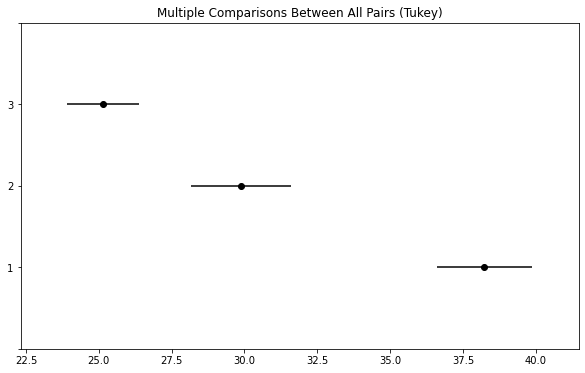

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['Age'], groups=df['Pclass'], alpha=0.05) 

tukey.plot_simultaneous()

plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

pd.DataFrame(tukey.summary())  

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  -8.3558    0.0 -11.7041  -5.0075   True
     1      3 -13.0928    0.0 -15.9622 -10.2234   True
     2      3   -4.737 0.0005  -7.6763  -1.7977   True
------------------------------------------------------


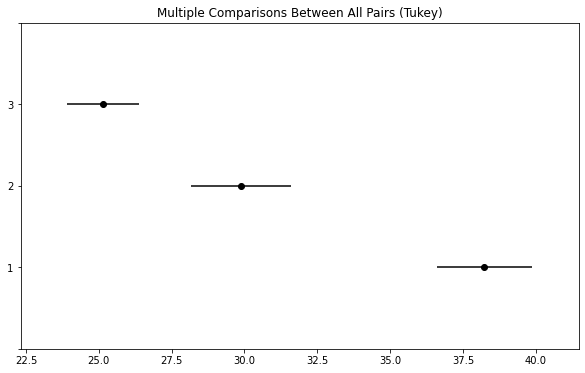

In [56]:
from statsmodels.stats.multicomp import MultiComparison
tukey = MultiComparison(df['Age'],df['Pclass'])
tukey_results = tukey.tukeyhsd()


# Print the results
print(tukey_results)
tukey_results.plot_simultaneous()
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")
plt.show()